## Exploring the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('TSLA.csv') #Reading the supplied data

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
findf = df.drop(['Date','Adj Close'],axis = 1) #Dropping the unrequired columns

In [5]:
findf.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
findf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
 1   High    2416 non-null   float64
 2   Low     2416 non-null   float64
 3   Close   2416 non-null   float64
 4   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.5 KB


## Checking for discerete values

In [7]:
attributes = ['Close','High','Low','Open','Volume']
findf[attributes].value_counts()

Close       High        Low         Open        Volume  
15.800000   16.629999   14.980000   16.400000   6921700     1
246.649994  254.729996  245.460007  250.460007  3703200     1
246.869995  250.070007  245.320007  247.000000  3725200     1
246.949997  254.960007  246.100006  252.520004  4834200     1
246.990005  252.119995  243.639999  249.119995  13475300    1
                                                           ..
141.600006  141.699997  134.210007  137.000000  9061500     1
142.000000  143.910004  140.970001  141.630005  7108100     1
142.149994  145.729996  141.100006  144.750000  9254500     1
142.190002  145.869995  139.860001  140.050003  10748200    1
780.000000  786.140015  673.520020  673.690002  47065000    1
Name: count, Length: 2416, dtype: int64

## Finding Correlations

In [8]:
corr_matrix = findf.corr()
corr_matrix['Close'].sort_values(ascending = False)

Close     1.000000
High      0.999640
Low       0.999447
Open      0.998886
Volume    0.505169
Name: Close, dtype: float64

array([[<Axes: xlabel='Close', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='Volume', ylabel='Close'>],
       [<Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Close', ylabel='Volume'>,
        <Axes: xlab

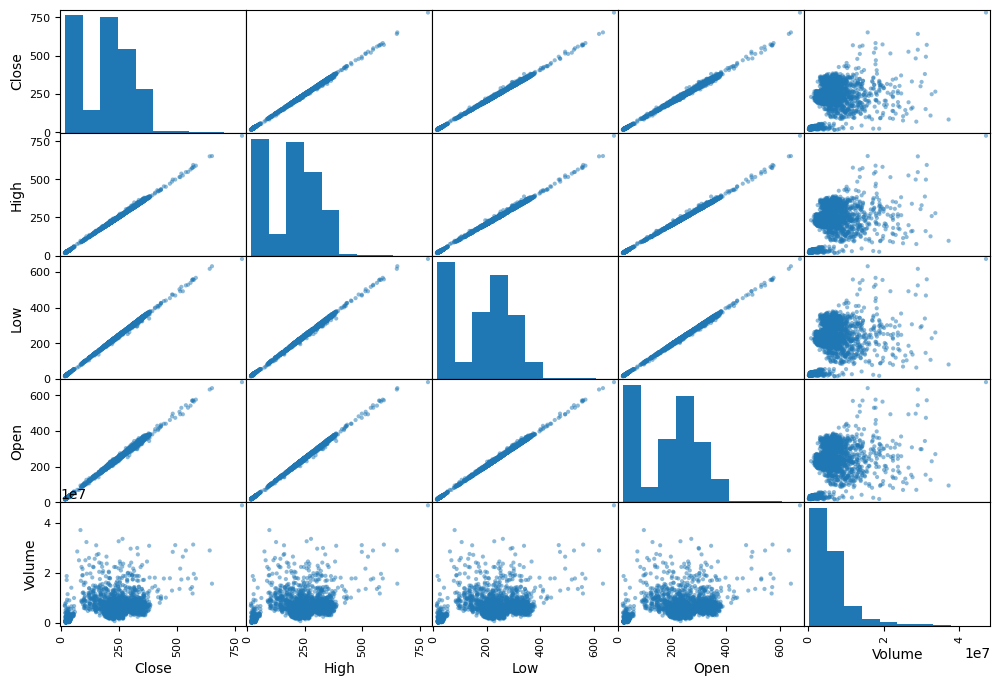

In [9]:
pd.plotting.scatter_matrix(findf[attributes],figsize = (12,8))

## Checking for Null Values

In [10]:
findf.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Splitting features and models

In [11]:
import numpy as np
x = np.array(findf.drop("Close",axis = 1))
y = np.array(findf["Close"].copy())

## Train-test splitting

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Choosing the model

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

## Testing the model and evaluating its performance

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
y_pred = model.predict(x_test)

In [16]:
mse = mean_squared_error(y_pred, y_test)

In [17]:
rmse = np.sqrt(mse)

In [18]:
rmse

2.09270994034476

In [19]:
model.score(x_test,y_test)

0.9997117604197432

## Saving the model using joblib

In [20]:
from joblib import dump
dump(model, 'Tesla.joblib')

['Tesla.joblib']

LINEAR REGRESSION

Mean Squared Error: 3012.2292156403996


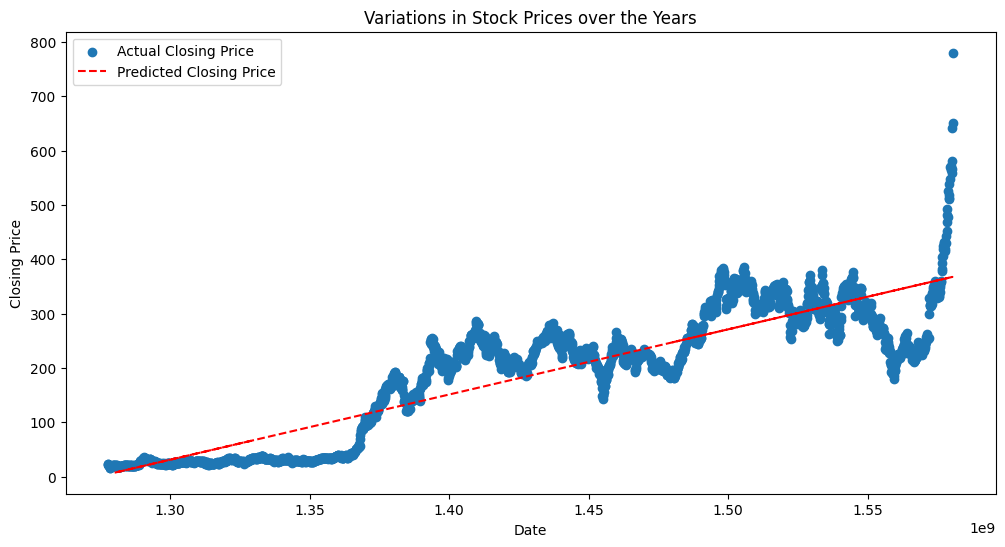

Prediction Time: 0.0028917789459228516 seconds
Training Time: 0.011294364929199219 seconds


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object
data['Date'] = data['Date'].apply(lambda x: x.timestamp())  # Convert datetime to Unix timestamp

# Extract features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model and measure training time
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Actual Closing Price')
plt.plot(X_test, y_pred, label='Predicted Closing Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

# Print prediction time, training time, and mean squared error
print("Prediction Time:", prediction_time, "seconds")
print("Training Time:", training_time, "seconds")


LOGISTIC REGRESSION

Mean Squared Error: 0.5
Training Time: 0.0082 seconds
Prediction Time: 0.0 seconds


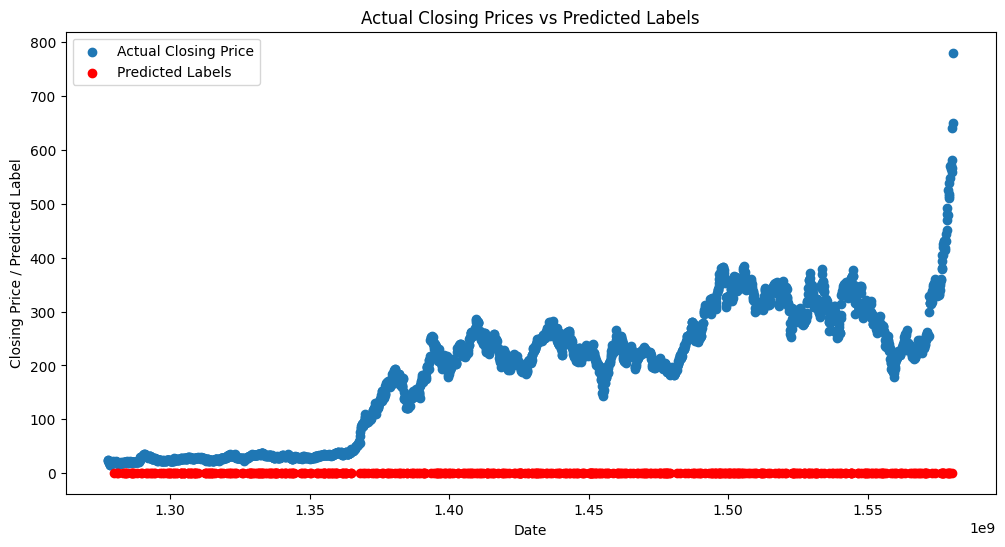

In [5]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object
data['Date'] = data['Date'].apply(lambda x: x.timestamp())  # Convert datetime to Unix timestamp

# Extract features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Convert the target variable to binary classification
# For example, you can consider whether the price increases or decreases compared to the previous day
y_binary = (y.diff() > 0).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train the logistic regression model and measure training time
start_time = time.time()
model = LogisticRegression()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print training and prediction times
print("Training Time:", "{:.4f}".format(training_time), "seconds")
print("Prediction Time:", prediction_time, "seconds")

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# cm = confusion_matrix(y_test, y_pred)
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# Plot the graph showing actual closing prices and predicted labels
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Actual Closing Price')

# Plot the predicted labels (1 for increase, 0 for decrease)
plt.scatter(X_test, y_pred, color='red', label='Predicted Labels')

plt.xlabel('Date')
plt.ylabel('Closing Price / Predicted Label')
plt.title('Actual Closing Prices vs Predicted Labels')
plt.legend()
plt.show()


DEISION TREE CLASSIFICATION

Mean Squared Error (MSE): 0.29338842975206614
Training Time: 0.05309915542602539 seconds
Prediction Time: 0.005136251449584961 seconds


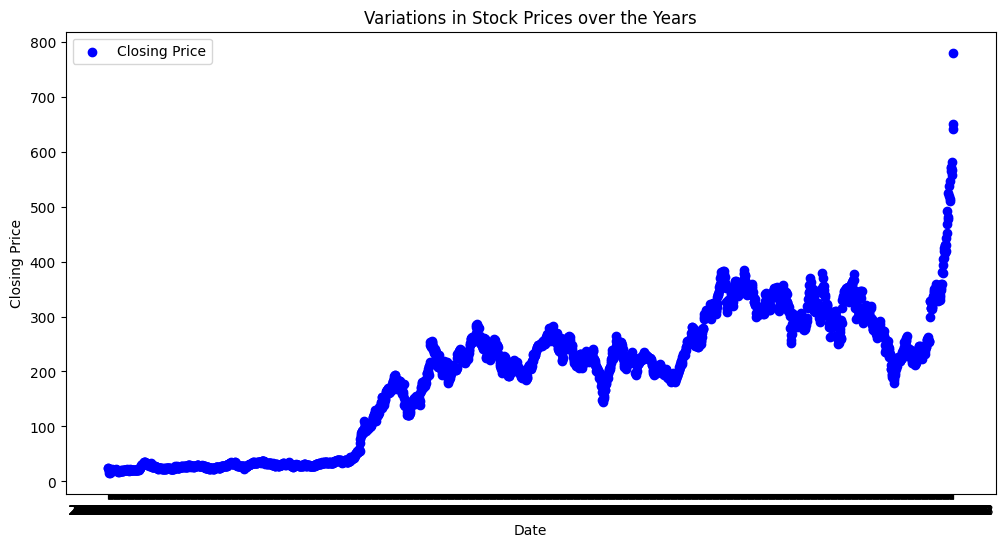

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Create a new column indicating whether the closing price increased (1) or decreased (0) compared to the previous day
data['Target'] = (data['Close'] > data['Close'].shift(1)).astype(int)

# Drop the first row since it doesn't have a previous day's closing price
data = data.dropna()

# Define features (independent variables) and target (dependent variable)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using OHLCV data as features
y = data['Target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier and measure training time
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()


POLYNOMIAL REGRESSION

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


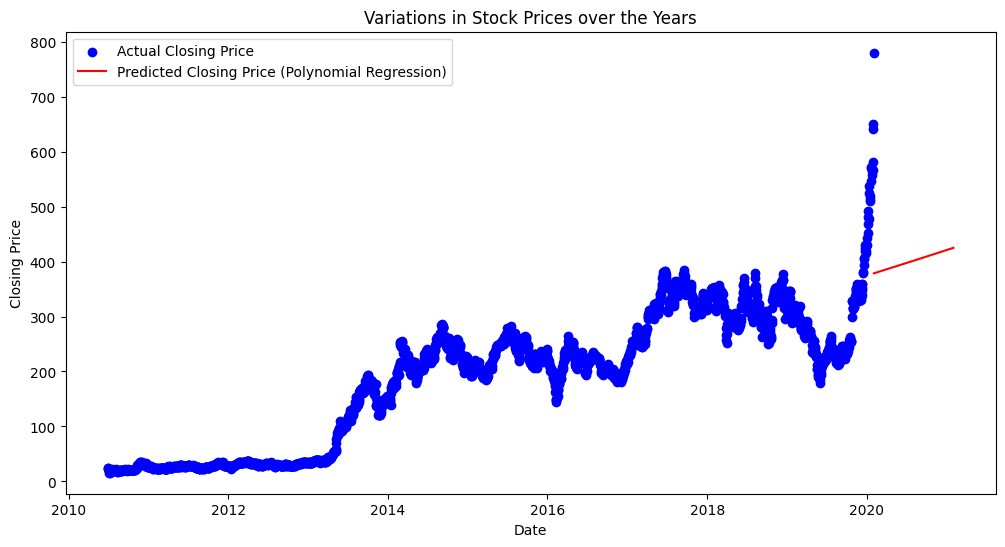

Mean Squared Error (MSE) on training set: 3174.820561133306
Training Time: 0.01564788818359375 seconds


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object

# Extract features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=3)  # You can adjust the degree as needed
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the model
start_time = time.time()
model = LinearRegression()
model.fit(X_train_poly, y_train)
training_time = time.time() - start_time

# Generate a sequence of dates for prediction
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=365)

# Convert future dates to polynomial features
future_dates_poly = poly_features.transform(np.array(future_dates).reshape(-1, 1))

# Predict closing prices for future dates
future_prices = model.predict(future_dates_poly)

# Calculate Mean Squared Error (MSE)
train_predictions = model.predict(X_train_poly)
train_mse = mean_squared_error(y_train, train_predictions)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Closing Price')
plt.plot(future_dates, future_prices, color='red', label='Predicted Closing Price (Polynomial Regression)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

print("Mean Squared Error (MSE) on training set:", train_mse)
print("Training Time:", training_time, "seconds")


KNN CLASSIFIER

Mean Squared Error: 3012.2292156403996
Training Time: 0.0032300949096679688 seconds
Prediction Time: 0.0034139156341552734 seconds


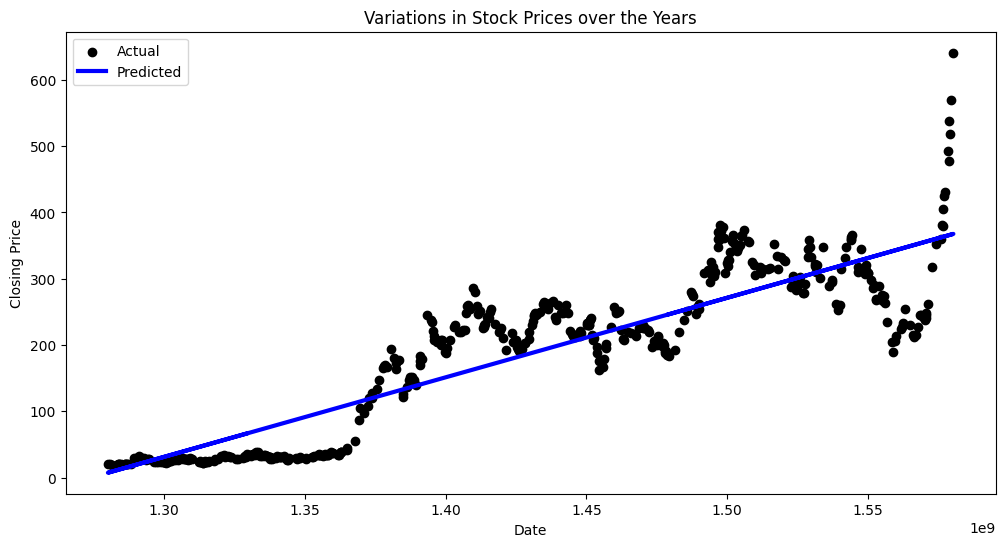

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object
data['Date'] = data['Date'].apply(lambda x: x.timestamp())
# Define features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model and measure training time
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Plot the curve showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()




DECISION TREE CLASSIFIER

Mean Squared Error: 47.36478506663063
Training Time: 0.00982046127319336 seconds
Prediction Time: 0.0012106895446777344 seconds


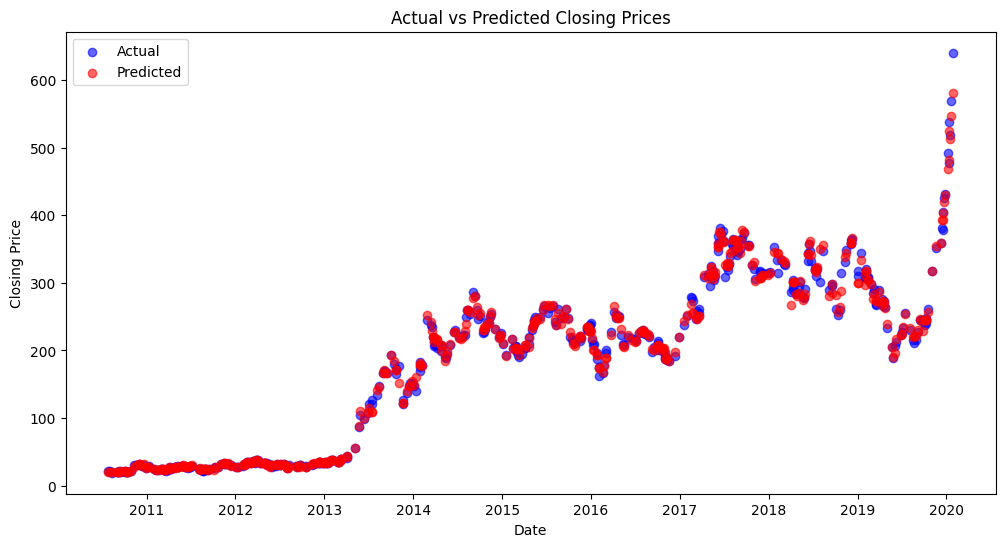

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object

# Extract features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor and measure training time
start_time = time.time()
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# # Plot the graph showing variations in stock prices over the years along with predicted closing prices
# plt.figure(figsize=(12, 6))
# plt.plot(data['Date'], data['Close'], label='Actual Closing Price', color='blue')
# plt.plot(X_test, y_pred, label='Predicted Closing Price', linestyle='--', color='red')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.title('Variations in Stock Prices over the Years')
# plt.legend()
# plt.show()


# Plot the scatter plot showing actual and predicted closing prices
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

